# PROJET - Le Réchauffement Climatique

## 1 - Le Réchauffement Climatique : mythe ou réalité ?

In [0]:
# Display the entire Dataset
import pandas as pd
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTDw3_sqMVmiywYyfRtX6aiPwHfOHfLDkF0Uf1H0ClDN8-AR3SXrb5qDOYZ-Spy8txsHhkyxRnmih-g/pub?output=csv')
df[df['dt']>'1850-01-01']

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249
1205,1850-06-01,13.150,0.614,18.946,2.817,7.106,0.857,16.353,0.245
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [0]:
# Let's create a column where we calculate the Ocean Temperature Average
OceanAverageTemp = (df['LandAndOceanAverageTemperature']*2) - (df['LandAverageTemperature'])
df['OceanAverageTemp'] = OceanAverageTemp
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,OceanAverageTemp
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,20.423
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,21.099
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,21.779
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,23.071


In [0]:
# Choose the 3 columns to plot : Land Average temperature & Land Ocean Temperature & LandAndOceanAverageTemperature
new = df[['dt','LandAverageTemperature','OceanAverageTemp', 'LandAndOceanAverageTemperature']]
new

,dt,LandAverageTemperature,OceanAverageTemp,LandAndOceanAverageTemperature
0,1750-01-01,3.034,NaN,NaN
1,1750-02-01,3.083,NaN,NaN
2,1750-03-01,5.626,NaN,NaN
3,1750-04-01,8.490,NaN,NaN
4,1750-05-01,11.573,NaN,NaN
...,...,...,...,...
3187,2015-08-01,14.755,20.423,17.589
3188,2015-09-01,12.999,21.099,17.049
3189,2015-10-01,10.801,21.779,16.290
3190,2015-11-01,7.433,23.071,15.252


In [0]:
# As we have averages by MONTH (12 months every year), we display only averages by YEAR
new.index=pd.to_datetime(new['dt'])
dt=new.resample('Y').mean()
dt

,LandAverageTemperature,OceanAverageTemp,LandAndOceanAverageTemperature
dt,,,
1750-12-31,8.719364,NaN,NaN
1751-12-31,7.976143,NaN,NaN
1752-12-31,5.779833,NaN,NaN
1753-12-31,8.388083,NaN,NaN
1754-12-31,8.469333,NaN,NaN
...,...,...,...
2011-12-31,9.516000,22.023000,15.769500
2012-12-31,9.507333,22.097333,15.802333
2013-12-31,9.606500,22.102333,15.854417


In [0]:
# We display only the results of 66 last years (From 1950 to 2015)
dt =dt.tail(66)
dt

,LandAverageTemperature,OceanAverageTemp,LandAndOceanAverageTemperature
dt,,,
1950-12-31,8.365250,21.913750,15.139500
1951-12-31,8.625667,21.996667,15.311167
1952-12-31,8.638250,22.087917,15.363083
1953-12-31,8.873750,21.968417,15.421083
1954-12-31,8.560667,21.900500,15.230583
...,...,...,...
2011-12-31,9.516000,22.023000,15.769500
2012-12-31,9.507333,22.097333,15.802333
2013-12-31,9.606500,22.102333,15.854417


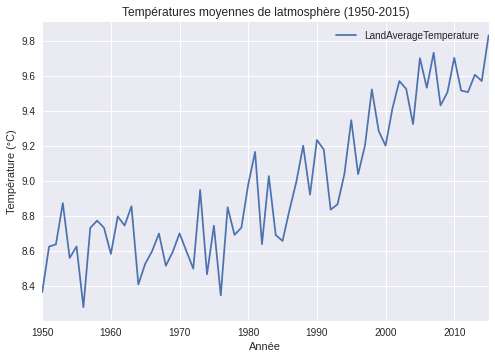

In [0]:
# Plot averages of land Temperature throughout 66 past years until 2015 
import matplotlib.pyplot as plt
plt.style.use('seaborn')
dt['LandAverageTemperature'].plot()
plt.xlabel('Année')
plt.ylabel('Température (°C)')
plt.title('Températures moyennes de latmosphère (1950-2015)')
plt.legend()

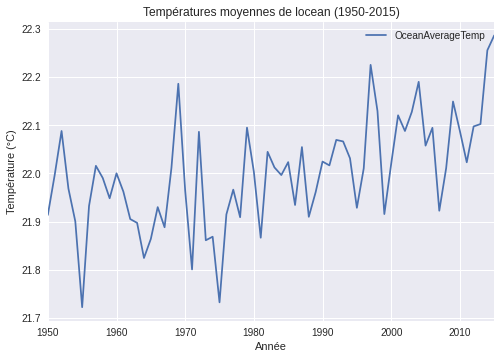

In [0]:
# Plot averages of Ocean Temperature throughout the 66 past years until 2015
import matplotlib.pyplot as plt
plt.style.use('seaborn')
dt['OceanAverageTemp'].plot() 
plt.xlabel('Année')
plt.ylabel('Température (°C)')
plt.title('Températures moyennes de locean (1950-2015)')
plt.legend()

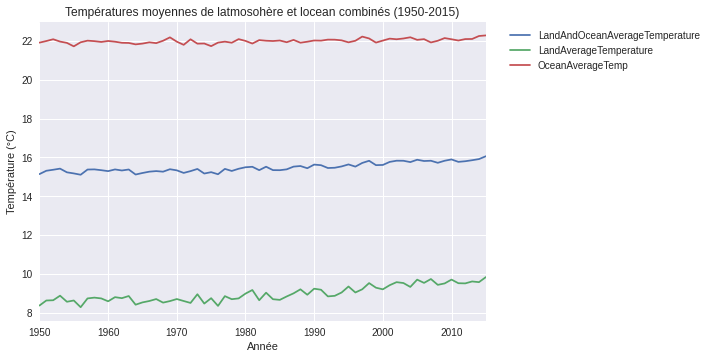

In [0]:
# Plot averages of Land Temperature AND Ocean Temperature AND Land+OceanAverageTemperature combined throughout the 66 past years until 2015
import matplotlib.pyplot as plt
plt.style.use('seaborn')
dt['LandAndOceanAverageTemperature'].plot() 

dt['LandAverageTemperature'].plot()

dt['OceanAverageTemp'].plot() 

plt.xlabel('Année')
plt.ylabel('Température (°C)')
plt.title('Températures moyennes de latmosohère et locean combinés (1950-2015)')

plt.legend(bbox_to_anchor=(1.5, 1))

## 2 - Le réchauffement Climatique : Responsabilité Humaine ?

### Bibliothèques et connexion Drive

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

from google.colab import drive
from google.colab import files
from google.colab import auth
import gspread
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()                        
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

### La hausse de températures et les influences humaine et naturelle

#### Import des données

In [0]:
# import du fichier avec les influences humaine et naturelle
data_set5 = drive.CreateFile({"id": "1-T39cH63SG0bGJhzMdPDoKuyKcZkQE2V"}) 
data_set5.GetContentFile("bloomberg_global_warming.csv")

df_fac_nat = pd.read_csv("bloomberg_global_warming.csv")

#### Visualisation

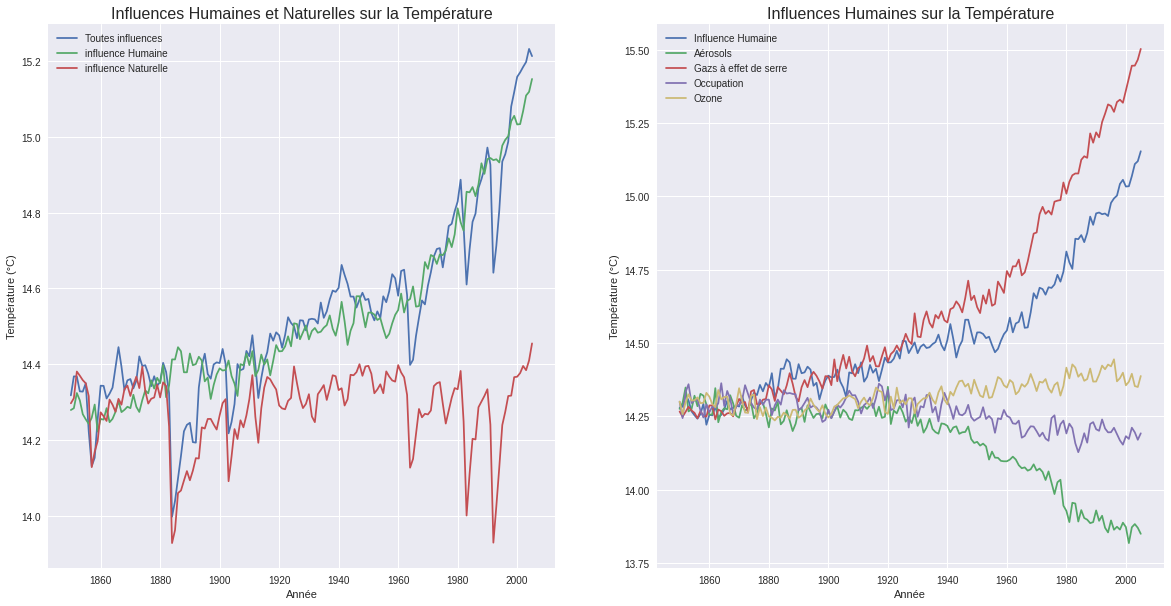

In [0]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)



ax1.plot(df_fac_nat['Year'],df_fac_nat['All forcings']-273.15,label='Toutes influences')
ax1.plot(df_fac_nat['Year'],df_fac_nat['Human']-273.15,label='influence Humaine')
ax1.plot(df_fac_nat['Year'],df_fac_nat['Natural']-273.15,label='influence Naturelle')
ax1.set_ylabel('Température (°C)')
ax1.set_xlabel('Année')
ax1.set_title('Influences Humaines et Naturelles sur la Température',size=16)
ax1.legend()

ax2.plot(df_fac_nat['Year'],df_fac_nat['Human']-273.15,label='Influence Humaine')
ax2.plot(df_fac_nat['Year'],df_fac_nat['Anthropogenic tropospheric aerosol']-273.15,label='Aérosols')
ax2.plot(df_fac_nat['Year'],df_fac_nat['Greenhouse gases']-273.15,label='Gazs à effet de serre')
ax2.plot(df_fac_nat['Year'],df_fac_nat['Land use']-273.15,label='Occupation')
ax2.plot(df_fac_nat['Year'],df_fac_nat['Ozone']-273.15,label='Ozone')
ax2.set_ylabel('Température (°C)')
ax2.set_xlabel('Année')
ax2.set_title('Influences Humaines sur la Température',size=16)
ax2.legend()


fig.show()

### La hausse de températures et le CO2 Atmosphérique

#### Import des données

In [0]:
# import du fichier avec les températures
data_set = drive.CreateFile({"id": "1lqxb6mUDiXivq12I7PRMp63eJ0bPJfSg"}) 
data_set.GetContentFile("p6_source_mult.csv")

df_temperature = pd.read_csv("p6_source_mult.csv",decimal=",")
df_temperature = df_temperature.astype({'Année':int,
              'GISS-NASA':float,
              'NOAA':float,
              'Hadley Center':float,
              'Moyenne':float})

# import du fichier avec le taux de CO2 Atmosphérique
data_set2 = drive.CreateFile({"id": "1Xj5K1PxcGR8wiTGoMG48ZTBp-3jblwFN"}) 
data_set2.GetContentFile("p15_source WDCGG.csv")

df_co2 = pd.read_csv("p15_source WDCGG.csv")



#### Visualisation

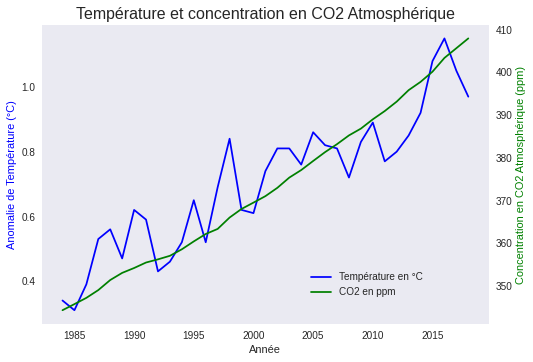

In [0]:
df_temp=df_temperature.loc[df_temperature['Année']>1983]



fig, ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.plot(df_co2['year'].unique(),df_temp['Moyenne'],color='b',label='Température en °C')
ax1.grid(b=False)

ax2.plot(df_co2['year'].unique(),df_co2.groupby('year')['mole fraction(ppm)'].mean(),color='g',label='CO2 en ppm')
ax2.grid(b=False)
fig.legend(bbox_to_anchor=(0.75, 0.25))



plt.title('Température et concentration en CO2 Atmosphérique',size=16)
ax1.set_xlabel('Année')
ax1.set_ylabel('Anomalie de Température (°C)',color='b')
ax2.set_ylabel('Concentration en CO2 Atmosphérique (ppm)',color='g')

plt.show()

### Emissions de CO2 dans le monde et en France

#### Import des données

In [0]:
# import du fichier avec l'indice de CO2 
data_set3 = drive.CreateFile({"id": "1uo5tlQjGXb_ceiFKXxZb3vz7DJKwFyK0"}) 
data_set3.GetContentFile("p27_source_EDGAR.csv")
df_co2_monde = pd.read_csv("p27_source_EDGAR.csv")

# import du fichier avec la répartition de l'émission de CO2
data_set4 = drive.CreateFile({"id": "1-EDY3TcS-mM2V2CtA1jBFCMPwNVggGFP"}) 
data_set4.GetContentFile("p32_source_AIE.csv")
df_co2_rep = pd.read_csv("p32_source_AIE.csv")
df_co2_rep=df_co2_rep.set_index('origine CO2').T

# import du fichier avec la répartition de l'émission de CO2
data_set6 = drive.CreateFile({"id": "1-ErVpeBvigxxX1cp3X33377BBMEGsSoe"}) 
data_set6.GetContentFile("p45h_source_AEE.csv")
df_FR_ges = pd.read_csv("p45h_source_AEE.csv")

#### Visualisations

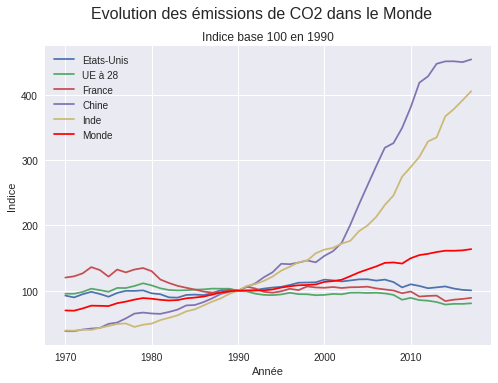

In [0]:
plt.plot(df_co2_monde['Année'],df_co2_monde['États-Unis'],label='Etats-Unis')
plt.plot(df_co2_monde['Année'],df_co2_monde['UE à 28'],label='UE à 28')
plt.plot(df_co2_monde['Année'],df_co2_monde['France'],label='France')
plt.plot(df_co2_monde['Année'],df_co2_monde['Chine'],label='Chine')
plt.plot(df_co2_monde['Année'],df_co2_monde['Inde'],label='Inde')
plt.plot(df_co2_monde['Année'],df_co2_monde['Monde'],label='Monde',color='red')

plt.suptitle('Evolution des émissions de CO2 dans le Monde',size=16)
plt.title('Indice base 100 en 1990')
plt.xlabel('Année')
plt.ylabel('Indice')

plt.legend()
plt.show()

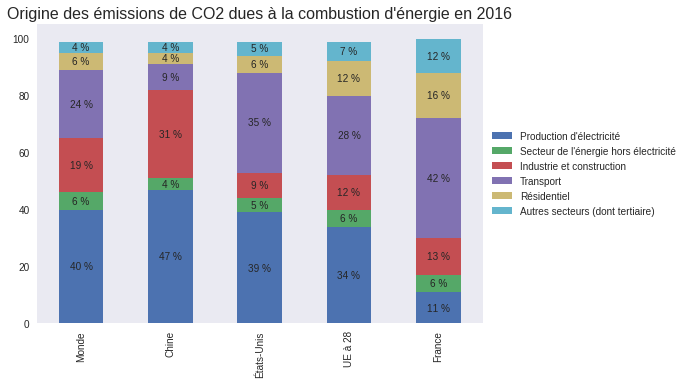

In [0]:
ax = df_co2_rep.plot.bar(stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Origine des émissions de CO2 dues à la combustion d\'énergie en 2016',size=16)
plt.grid(b=False)

plt.show()

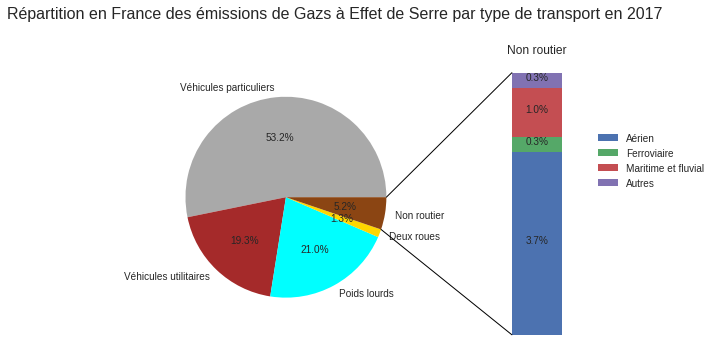

In [0]:
fig = plt.figure(figsize=(9, 5.0625))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

xpos = 0
bottom = 0
ratios = df_FR_ges['Pourcentage des émissions'][5:].values.tolist()
width = .2

angle = -180 * ratios[0]
ax1.pie(df_FR_ges['Pourcentage des émissions'][0:5],
        labels=df_FR_ges['Mode transport'][0:5],
        autopct='%1.1f%%',colors=('darkgrey','brown','cyan','gold','saddlebrown'))




for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom)
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%1.1f%%" % (ax2.patches[j].get_height()),
             ha='center')
    
ax2.set_title('Non routier')
ax2.legend(df_FR_ges['Mode transport'][5:],loc='lower right',bbox_to_anchor=(1.2, 0.5))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

theta1, theta2 = ax1.patches[-1].theta1, ax1.patches[4].theta2
center, r = ax1.patches[1].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

plt.title('Répartition en France des émissions de Gazs à Effet de Serre par type de transport en 2017\n\n',size=16,loc='right')

plt.show()

## 3 - Le Réchauffement Climatique : sans conséquence ?

### 3a - Exemple avec l'élévation du niveau de la mer [Fantine]. 

**LA FONTE DES CALOTTES POLAIRES.**

Sous l’effet du réchauffement climatique, les calottes glaciaires du Groenland et de l’Antarctique fondent à un rythme alarmant. 

La fonte des inlandsis polaires a pour principal corollaire une augmentation du niveau marin.

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
# JEU DE DONNES SUR L'ANTARTICQUE

# Source: Wiese, D. N., D.-N. Yuan, C. Boening, F. W. Landerer, and M. M. Watkins (2019) JPL GRACE and GRACE-FO Mascon Ocean, Ice, and Hydrology Equivalent Water Height RL06M CRI Filtered Version 2.0, Ver. 2.0, PO.DAAC, CA, USA. Dataset accessed [YYYY-MM-DD] at http://dx.doi.org/10.5067/TEMSC-3MJ62.

link = "https://drive.google.com/open?id=1sYYJ3YUAwf5Lwe71yvyYB9PlJsgREzCX"
id = "1sYYJ3YUAwf5Lwe71yvyYB9PlJsgREzCX"

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('glaciers_mass_NASA.xlsx') 
df_antartica_mass = pd.read_excel ('glaciers_mass_NASA.xlsx', skiprows= 1,  sheet_name="Antartica")

# 2. Je nettoie mon jeu de données. 

#je convertis mes dates qui sont au format décimal excel au format date.
def decimalyear_todate (start):
  from datetime import datetime, timedelta
  year = int(start)
  rem = start - year
  base = datetime(year, 1, 1)
  TheTime = base + timedelta(seconds=(base.replace(year=base.year + 1) - base).total_seconds() * rem)
  return TheTime.strftime("%Y-%m-%d %H:%M:%S")


df_antartica_mass["TIME"] = df_antartica_mass["TIME"].apply(lambda x: decimalyear_todate(x))

#je garde seulement YYYY-MM-DD et je supprime les heures et secondes. 
df_antartica_mass["TIME"] = df_antartica_mass["TIME"].apply(lambda x: x[0:10])


#je crée 3 colonnes distinctes pour l'année, le mois et le jour. 
df_antartica_mass.insert(0, "Annee", df_antartica_mass["TIME"].apply(lambda x: x[0:4]), True) 
df_antartica_mass.insert(1, "Mois", df_antartica_mass["TIME"].apply(lambda x: x[5:7]), True) 
df_antartica_mass.insert(2, "Jour", df_antartica_mass["TIME"].apply(lambda x: x[8:10]), True) 


#je supprime ma colonne "TIME" puisque j'ai créé les colonnes au dessus.
df_antartica_mass.drop(columns=["TIME"], inplace=True)

#je convertis mes colonnes au bon format.
df_antartica_mass.Annee = pd.to_numeric(df_antartica_mass.Annee)
df_antartica_mass.Mois = pd.to_numeric(df_antartica_mass.Mois)
df_antartica_mass.Jour = pd.to_numeric(df_antartica_mass.Jour)

df_antartica_mass.rename(columns={"Antarctic mass (Gigatonnes)" : "Calotte_polaire_masse"}, inplace=True)


In [0]:
# JEU DE DONNEES SUR LE GROENLAND. 

# Source: Wiese, D. N., D.-N. Yuan, C. Boening, F. W. Landerer, and M. M. Watkins (2019) JPL GRACE and GRACE-FO Mascon Ocean, Ice, and Hydrology Equivalent Water Height RL06M CRI Filtered Version 2.0, Ver. 2.0, PO.DAAC, CA, USA. Dataset accessed [YYYY-MM-DD] at http://dx.doi.org/10.5067/TEMSC-3MJ62.

link2 = "https://drive.google.com/open?id=11M4I5dmU8604DufvEGjK7uezK0BQHIu2"
id2 = "11M4I5dmU8604DufvEGjK7uezK0BQHIu2"

downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('groenland_mass_NASA.csv') 
df_groenland = pd.read_csv('groenland_mass_NASA.csv', skiprows= 1, sep=";")

# 2. Je nettoie mon jeu de données. 

#je convertis mes dates qui sont au format décimal excel au format date.
def decimalyear_todate (start):
  from datetime import datetime, timedelta
  year = int(start)
  rem = start - year
  base = datetime(year, 1, 1)
  TheTime = base + timedelta(seconds=(base.replace(year=base.year + 1) - base).total_seconds() * rem)
  return TheTime.strftime("%Y-%m-%d %H:%M:%S")

df_groenland["TIME"] = df_groenland["TIME"].apply(lambda x: decimalyear_todate(x))

#je garde seulement YYYY-MM-DD et je supprime les heures et secondes. 
df_groenland["TIME"] = df_groenland["TIME"].apply(lambda x: x[0:10])


#je crée 3 colonnes distinctes pour l'année, le mois et le jour. 
df_groenland.insert(0, "Annee", df_groenland["TIME"].apply(lambda y: y[0:4]), True) 
df_groenland.insert(1, "Mois", df_groenland["TIME"].apply(lambda y: y[5:7]), True) 
df_groenland.insert(2, "Jour", df_groenland["TIME"].apply(lambda y: y[8:10]), True) 


#je supprime ma colonne "TIME" puisque j'ai créé les colonnes au dessus.
df_groenland.drop(columns=["TIME"], inplace=True)

#je convertis mes colonnes au bon format.
df_groenland.Annee = pd.to_numeric(df_groenland.Annee)
df_groenland.Mois = pd.to_numeric(df_groenland.Mois)
df_groenland.Jour = pd.to_numeric(df_groenland.Jour)

df_groenland.rename(columns={"Greenland mass (Gigatonnes)" : "Calotte_polaire_masse"}, inplace=True)

In [0]:
# JEU DE DONNEES SUR L'ELEVATION DU NIVEAU MOYEN DE LA MER. 

url2 = "https://drive.google.com/open?id=1FvBHmQwOKBPvtFSrv1knqmA86iY1kow0"
id = "1FvBHmQwOKBPvtFSrv1knqmA86iY1kow0"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('MSL_Serie_MERGED_Global_AVISO_GIA_Adjust_Filter2m_niveau des mers.csv')
df_niveau_mer = pd.read_csv('MSL_Serie_MERGED_Global_AVISO_GIA_Adjust_Filter2m_niveau des mers.csv', sep=" ", header=None)

# 2. Je nettoie mon jeu de données. 

#je renomme mes colonnes
df_niveau_mer.rename(columns={0: "Date", 1 : "Augmentation_niveau_0", 2 : "Anomalies"}, inplace=True) 

#je convertis mes dates qui sont au format décimal excel au format date.
import math
import datetime

def xldate_to_datetime(xldatetime): 
  tempDate = datetime.datetime(1899, 12, 30)
  (days, portion) = math.modf(xldatetime)
  deltaDays = datetime.timedelta(days=days)
  secs = int(24 * 60 * 60 * portion)
  detlaSeconds = datetime.timedelta(seconds=secs)
  TheTime = (tempDate + deltaDays + detlaSeconds )
  return TheTime.strftime("%Y-%m-%d %H:%M:%S")

df_niveau_mer["Date"] = df_niveau_mer["Date"].apply(lambda x: (x-1900)*365.25)
df_niveau_mer["Date"] = df_niveau_mer["Date"].apply(lambda x: xldate_to_datetime(x)) 

#je garde seulement YYYY-MM-DD et je supprime les heures et secondes. 
df_niveau_mer["Date"] = df_niveau_mer["Date"].apply(lambda x: x[0:10])


#je crée 3 colonnes distinctes pour l'année, le mois et le jour. 
df_niveau_mer["Annee"] = df_niveau_mer["Date"].apply(lambda x: x[0:4])
df_niveau_mer["Mois"] = df_niveau_mer["Date"].apply(lambda x: x[5:7])
df_niveau_mer["Jour"] = df_niveau_mer["Date"].apply(lambda x: x[8:10])

#je supprime la colonne "Date" puisque j'ai créé les 3 colonnes précédentes et la colonne "Anomalies" car nous n'en aurons pas besoin. 
df_niveau_mer.drop(columns=["Date", "Anomalies"], inplace=True)

#je convertis mes colonnes au bon format.
df_niveau_mer.Annee = pd.to_numeric(df_niveau_mer.Annee)
df_niveau_mer.Mois = pd.to_numeric(df_niveau_mer.Mois)
df_niveau_mer.Jour = pd.to_numeric(df_niveau_mer.Jour)

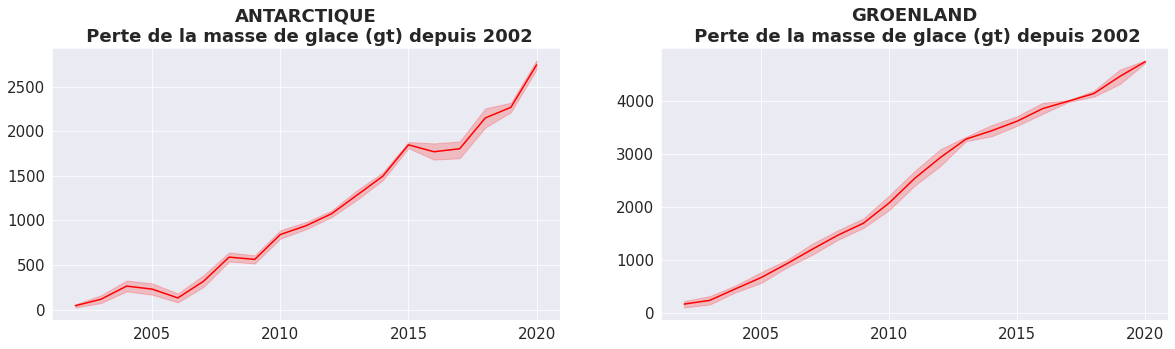

In [0]:
# REPRESENTATIONS GRAPHIQUES DE LA FONTE DES CALOTTES POLAIRES.

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_style("darkgrid")
fig, axes = plt.subplots(1,2, figsize = (20,5)) 
ax1 = sns.lineplot(df_antartica_mass["Annee"], abs(df_antartica_mass["Calotte_polaire_masse"]), ax=axes[0], color="red")
ax2 = sns.lineplot(df_groenland["Annee"], abs(df_groenland["Calotte_polaire_masse"]), ax=axes[1], color="red")

#je précise mes titres
axes[0].set_title("ANTARCTIQUE\n Perte de la masse de glace (gt) depuis 2002", fontsize=18, weight='bold')
axes[1].set_title("GROENLAND\n Perte de la masse de glace (gt) depuis 2002", fontsize=18, weight='bold')

#j'efface l'étiquette pour l'axe des y et des x
axes[1].set_ylabel('')
axes[0].set_ylabel('')
axes[1].set_xlabel('')
axes[0].set_xlabel('')

#j'augmente la taille de la police
axes[0].tick_params(labelsize=15)
axes[1].tick_params(labelsize=15)

#pour afficher des années en tant que nbre entiers. 
axes[0].locator_params(integer=True)
axes[1].locator_params(integer=True)

plt.show()

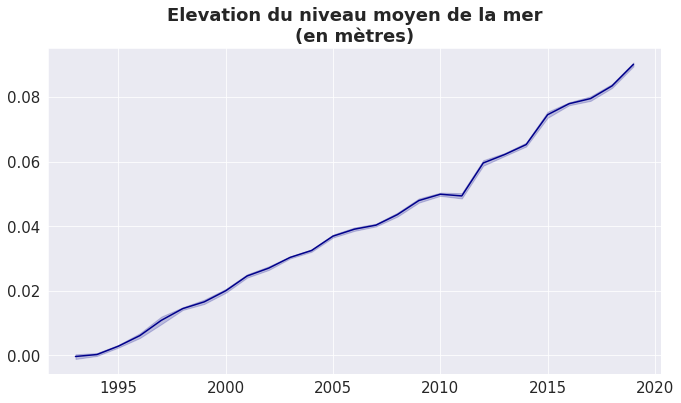

In [0]:
# REPRESENTATION GRAPHIQUE DE LA HAUSSE DU NIVEAU DE LA MER
fig, ax = plt.subplots(figsize=(11,6))
sns.lineplot(df_niveau_mer.Annee, df_niveau_mer.Augmentation_niveau_0, color="darkblue")
ax.tick_params(labelsize=15)
ax.set_title("Elevation du niveau moyen de la mer\n(en mètres)", fontsize=18, weight="bold")
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

In [0]:
# CORRELATION ? 

# Pour cela, il faut que les variables que je compare aient la même dimension. 
# Je vais donc créer un dataframe global où il y a aura pour chaque année la masse de glace perdue par les 2 calottes polaires et la hausse du niveau de la mer. 


# DATAFRAME FONTE DES CALOTTES POLAIRES 

# Je crée un df intermédiaire pour regrouper la masse de glace perdue par le Groenland et l'Antarctique. 

# Dans un souci de simplification, je supprime mes colonnes "Jour" car les mesures n'ont pas été faites à la même date (mais une seule mesure par mois pour chaque df donc c'est ok). 
df_groenland.drop(columns=["Jour"], inplace=True)
df_antartica_mass.drop(columns=["Jour"], inplace=True)

# Je merge mes 2 df. 
df_polaire = df_antartica_mass.merge(df_groenland, on=["Annee", "Mois"], how="inner", suffixes=("_antartica", "_groenland"))

# Je supprime les colonnes "anomalies" (qui correspondent à la marge d'erreur).
df_polaire.drop(columns=["Antarctic mass 1-sigma uncertainty", "Greenland mass 1-sigma uncertainty (Gigatonnes)"], inplace=True)

# J'ajoute une nouvelle colonne qui correspond à la perte totale de glace pour les 2 calottes polaires. 
df_polaire.insert(4, "Total", (df_polaire.Calotte_polaire_masse_antartica + df_polaire.Calotte_polaire_masse_groenland))

# Maintenant je vais conserver une valeur par année.  
df_inter_polaire = (df_polaire.groupby("Annee")["Total"].mean()).to_frame()
df_inter_polaire.reset_index(inplace=True)


# DATAFRAME NIVEAU MOYEN DE LA MER 

# Je vais conserver une valeur par année.  
df_inter_sea = (df_niveau_mer.groupby("Annee")["Augmentation_niveau_0"].mean()).to_frame()
df_inter_sea.reset_index(inplace=True)


# DATAFRAME GLOBAL  
df_corr = df_inter_polaire.merge(df_inter_sea, on="Annee", how="inner") #je ne veux que les années en commun. 
df_corr.rename(columns={"Total" : "Fonte_glace", "Augmentation_niveau_0" : "Aug_nv_mer"}, inplace=True)

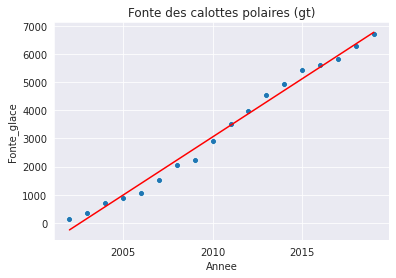

In [0]:
# PREDICTIONS

# 1. Je crée un modèle pour calculer la masse que perdront les deux pôles dans les prochaines années. 

# diagramme de dispersion
sns.scatterplot(x=df_corr.Annee, y=abs(df_corr.Fonte_glace))

# Régression linéaire
Xaxis = df_corr.Annee
Yaxis = abs(df_corr.Fonte_glace)
model_fonte_poles = np.polyfit(x = Xaxis, y = Yaxis, deg = 1) #équation 

# Je trace ma droite de régression linéaire. 
liste_y = []

for x in df_corr["Annee"]:
  y = np.poly1d(model_fonte_poles)(x)
  liste_y.append(y)

fonte_glace = pd.Series(liste_y)
plt.plot(df_corr.Annee, fonte_glace, color="red")

# Finitions

plt.title("Fonte des calottes polaires (gt)")
plt.locator_params(integer=True)
plt.show()

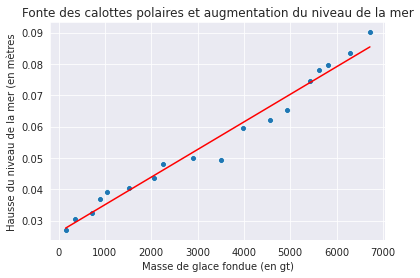

In [0]:
# Conséquences sur le niveau de la mer. 

# Diagramme de dispersion entre la fonte des glaces et la hausse du niveau de la mer.
sns.scatterplot(x=abs(df_corr.Fonte_glace), y=df_corr.Aug_nv_mer, data=df_corr)

# Régression linéaire.

# Régression linéaire
X = abs(df_corr.Fonte_glace)
Y = df_corr.Aug_nv_mer
model_aug_mer = np.polyfit(x = X, y = Y, deg = 1) #équation 

# Je trace ma droite de régression linéaire. 
my_predic = []
for x in abs(df_corr.Fonte_glace):
  y = np.poly1d(model_aug_mer)(x)
  my_predic.append(y)

aug_mer = pd.Series(my_predic)
plt.plot(abs(df_corr.Fonte_glace), aug_mer, color="red")

# Finitions
plt.title("Fonte des calottes polaires et augmentation du niveau de la mer")
plt.xlabel("Masse de glace fondue (en gt)")
plt.ylabel("Hausse du niveau de la mer (en mètres")

plt.show()

In [0]:
# Dans 100 ans:

# fonte des calottes polaires
x = 2020 + 100
result_glace_fondue = round(np.poly1d(model_fonte_poles)(x))

# hausse du niveau de la mer
result_hausse_mer = round(np.poly1d(model_aug_mer)(result_glace_fondue) * 100)

print("Dans 100 ans, l'Antarctique et le Groenland auront perdu {} gigatonnes de glace depuis 2002.\nEn conséquence, le niveau de la mer aura augmenté de {} cm.".format(result_glace_fondue, result_hausse_mer))

Dans 100 ans, l'Antarctique et le Groenland auront perdu 48534.0 gigatonnes de glace depuis 2002.
En conséquence, le niveau de la mer aura augmenté de 45.0 cm.


### 3b - Perte de la biodiversité : L’exemple des coraux



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


Text(0, 0.5, 'Pourcentage %')

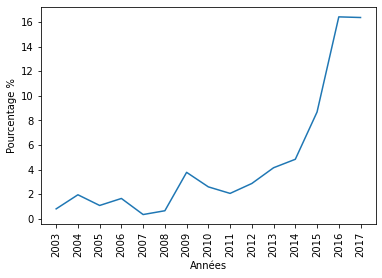

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

GoogleSheetID = '1RO7O11cwJDj04xLHA8nuDNfzGmPLfHLay8ld3znuRSE'
WorkSheetName = 'blanc_corail'

URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    GoogleSheetID,
    WorkSheetName
)

df = pd.read_csv(URL)

df2=df[df.Ecoregion.str.contains('Great Barrier',case=False)]
df2['YEAR'] = df2['Date'].apply(lambda x: x[-4:])
df3=df2.groupby('YEAR')['Average_Bleaching','SSTA_Standard_Deviation'].mean()
fig, ax1 = plt.subplots()
ax1.plot(df3.index,df3['Average_Bleaching'])

plt.xlabel('Années')
plt.xticks(rotation=90)
plt.ylabel('Pourcentage %')

## 4 - Le Réchauffement Climatique : Définitif ou Réversible ?

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

from google.colab import drive
from google.colab import files
from google.colab import auth
import gspread
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()                        
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#4/ywFOzYP76cdyEtXH_l3gKce3ju_X-TpLTBcZlwdeWrpus1e5VUYnesQ

###Greater Mekong Subregion hydropower dams (2014)
A dataset containing known operational and planned hydropower dams in the Greater Mekong Subregion compiled by International Rivers and published in June 2014. Dams data are compiled from various sources, including: the Global Reservoir and Dam (GRanD) Database, the Consultative Group on International Agricultural Research (CGIAR) Challenge Program on Water and Food - Mekong (for Mekong basin dams only), the United States National Inventory of Dams (NID), other government dam inventories, and original data collection by International Rivers.

https://data.opendevelopmentmekong.net/dataset/greater-mekong-subregion-hydropower-dams?type=dataset

In [0]:
#import file csv

dataset_mekong_dams = drive.CreateFile({"id": "1bU33lJuAyT4pKtJtSJA7t87WkFhHzwb6"}) 

dataset_mekong_dams.GetContentFile("Thu_dataset_mekongdams(2014).csv")

df_mekong_dams = pd.read_csv("Thu_dataset_mekongdams(2014).csv")
df_mekong_dams

,FID,Country,Project,Basin,Latitude,Longitude,Capacity,Size,Dam_Height,Status,Complet_Da
0,mekongdams.1,Cambodia,Unknown,Mekong,10.65640,104.869324,0.00,NoData,0.0,Unknown,Unknown
1,mekongdams.2,Cambodia,Unknown,Mekong,11.57321,104.525291,0.00,NoData,0.0,Unknown,Unknown
2,mekongdams.3,Cambodia,Unknown,Mekong,11.57321,104.525291,0.00,NoData,0.0,Unknown,Unknown
3,mekongdams.4,Cambodia,Unknown,Mekong,11.95385,104.593422,0.00,NoData,0.0,Unknown,Unknown
4,mekongdams.5,Cambodia,Unknown,Mekong,11.95385,104.593422,0.00,NoData,0.0,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
435,mekongdams.436,China,In Winter,Lancang,31.87600,96.990000,10.80,NoData,0.0,Planned,Unknown
436,mekongdams.437,China,Ang Sai,Mekong,32.46450,95.370200,55.00,NoData,0.0,Operational,Unknown
437,mekongdams.438,China,Aung Race,Lancang,32.46450,95.370200,5.50,NoData,0.0,Planned,Unknown
438,mekongdams.439,China,Long Qing Xia,Mekong,32.52590,95.210500,2.50,NoData,0.0,Operational,Unknown


In [0]:
df_mekong_dams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID         440 non-null    object 
 1   Country     440 non-null    object 
 2   Project     440 non-null    object 
 3   Basin       440 non-null    object 
 4   Latitude    440 non-null    float64
 5   Longitude   440 non-null    float64
 6   Capacity    440 non-null    float64
 7   Size        435 non-null    object 
 8   Dam_Height  440 non-null    float64
 9   Status      440 non-null    object 
 10  Complet_Da  440 non-null    object 
dtypes: float64(4), object(7)
memory usage: 37.9+ KB


In [0]:
#Display les dams qui ont ("Status" != "Unknown") & ("Capacity" > 0)

df_mekong_dams = df_mekong_dams[ (df_mekong_dams['Status'] != 'Planned') & (df_mekong_dams['Capacity'] > 0) ]
df_mekong_dams

df_Country_Status = df_mekong_dams[ ['FID', 'Country', 'Capacity', 'Status'] ]
df_Country_Status

df_index_FID = df_Country_Status.set_index('FID')
df_index_FID

,Country,Capacity,Status
FID,,,
mekongdams.12,Cambodia,100.00,Under Construction
mekongdams.13,Vietnam,86.00,Operational
mekongdams.14,Cambodia,10.00,Under Construction
mekongdams.34,Vietnam,280.00,Operational
mekongdams.53,Vietnam,12.00,Operational
...,...,...,...
mekongdams.433,China,150.00,Under Construction
mekongdams.434,China,16.50,Under Construction
mekongdams.437,China,55.00,Operational


###Comparer le nombre de barrages hydrauélectriques possédant par les pays de la région du Mekong (Chine, Vietnam, Laos, Cambodge, Thailand)

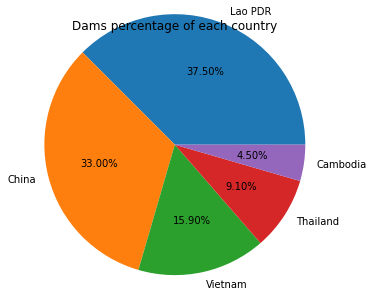

In [0]:
dams_percentage = round( ((df_mekong_dams["Country"].value_counts() / df_mekong_dams["Country"].value_counts().sum()) * 100), 1)    
dams_percentage

import matplotlib.pyplot as plt

plt.pie(dams_percentage,
        radius = 1.5,
        autopct='%1.2f%%',
        labels = dams_percentage.index)

plt.title("Dams percentage of each country")

plt.show()

###Comper la capacité des barrages hydrauélectriques des pays de la région du Mekong (Chine, Vietnam, Laos, Cambodge, Thailand)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


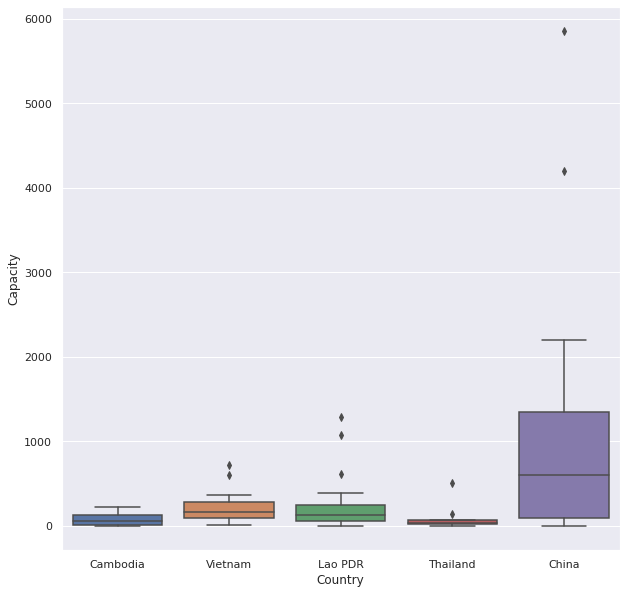

In [0]:
df_mekong_dams = df_mekong_dams[ (df_mekong_dams['Status'] != 'Planned') & (df_mekong_dams['Capacity'] > 0) ]
df_mekong_dams

import seaborn as sns

sns.set(rc = {'figure.figsize':(10, 10)})

sns.boxplot(x = df_mekong_dams['Country'],
            y = df_mekong_dams['Capacity'])

plt.show()

###Taux de Gas à effet de serre dans les pays du mekong et dans le monde (1990-2014)

The Emissions Time Series, EDGAR aims to inform scientists and policy makers on the evolution of the emission inventories over time for all world countries.

https://data.opendevelopmentmekong.net/dataset/total-greenhouse-gas-emissions-kt-of-co2-equivalent?type=dataset

In [0]:
ds_greenhouse_gas_emissions_world = drive.CreateFile({"id": "1w-4ni5VZGq_BukI4OLY00D94qI8LKmQ9"}) 
ds_greenhouse_gas_emissions_world.GetContentFile("Thu_dataset_Total greenhouse gas emissions of the Lower Mekong Countries and Monde (1990-2014).csv")

df_greenhouse_gas_emissions_world = pd.read_csv("Thu_dataset_Total greenhouse gas emissions of the Lower Mekong Countries and Monde (1990-2014).csv")
df_greenhouse_gas_emissions_world

,Country,Year,Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e),Total GHG Emissions Including Land-Use Change and Forestry (MtCO?e?),Total CO2 (excluding Land-Use Change and Forestry) (MtCO2),Total CH4 (MtCO2e),Total N2O (MtCO2e),Total F-Gas (MtCO2e),Total CO2 (including Land-Use Change and Forestry) (MtCO2),Total CH4 (including Land-Use Change and Forestry) (MtCO2e),Total N2O (including Land-Use Change and Forestry) (MtCO2e),Energy (MtCO2e),Industrial Processes (MtCO2e),Agriculture (MtCO2e),Waste (MtCO2e),Land-Use Change and Forestry (MtCO2),Bunker Fuels (MtCO2),Electricity/Heat (MtCO2),Manufacturing/Construction (MtCO2),Transportation (MtCO2),Other Fuel Combustion (MtCO2e),Fugitive Emissions (MtCO2e)
0,Cambodia,1990,15.351070,42.821070,1.260416,10.979845,3.110505,0.000304,27.660416,11.725845,3.434505,2.003348,0.000304,13.115257,0.232161,27.470000,NaN,NaN,NaN,NaN,0.742932,0.000000
1,Cambodia,1991,15.257660,42.727660,1.304384,10.754667,3.197588,0.001021,27.704384,11.500667,3.521588,2.189495,0.001021,12.825624,0.241520,27.470000,NaN,NaN,NaN,NaN,0.885111,0.000000
2,Cambodia,1992,15.888146,43.358146,1.348352,11.114496,3.423560,0.001738,27.748352,11.860496,3.747560,2.375641,0.001738,13.259887,0.250880,27.470000,NaN,NaN,NaN,NaN,1.027289,0.000000
3,Cambodia,1993,16.738263,44.208263,1.384992,11.805380,3.545435,0.002456,27.784992,12.551380,3.869435,2.554460,0.002456,13.921108,0.260239,27.470000,NaN,NaN,NaN,NaN,1.169468,0.000000
4,Cambodia,1994,15.894545,43.364545,1.476592,10.881084,3.533695,0.003173,27.876592,11.627084,3.857695,2.736942,0.054469,12.833535,0.269599,27.470000,NaN,NaN,NaN,NaN,1.311646,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,World,2010,42771.641200,45760.962720,32305.705880,6957.833098,2835.968652,672.133564,34920.893400,7248.524098,2919.411652,33715.650960,2507.142570,5077.484952,1471.362711,2989.321519,1126.06,14292.39,5851.43,7004.57,4076.349803,2490.911160
146,World,2011,44059.730100,47025.974310,33390.277340,7037.296360,2909.536577,722.619814,36005.515560,7316.971360,2980.867577,34663.167940,2733.496888,5179.739951,1483.325319,2966.244212,1147.01,14877.45,6115.78,7127.10,4018.810737,2524.027201
147,World,2012,44530.980680,47583.606990,33726.516320,7098.430224,2932.928073,773.106064,36385.689630,7406.822224,3017.989073,34946.624430,2875.579206,5213.489122,1495.287926,3052.626310,1088.82,15073.84,6030.07,7253.54,4030.581671,2558.592759
148,World,2013,45261.251680,48257.297040,34389.595930,7129.182719,2918.880717,823.592314,37028.982290,7413.958719,2990.763717,35520.281550,3054.301524,5179.418072,1507.250534,2996.045366,1105.33,15301.45,6110.18,7382.53,4140.702606,2585.418941


In [0]:
#Display 3 columns importants : Country & Year & Total CH4 (MtCO2e) / (index = Country)

df_columns_importants = df_greenhouse_gas_emissions_world[ ['Country', 'Year', 'Total CH4 (MtCO2e)'] ]
df_columns_importants

,Country,Year,Total CH4 (MtCO2e)
0,Cambodia,1990,10.979845
1,Cambodia,1991,10.754667
2,Cambodia,1992,11.114496
3,Cambodia,1993,11.805380
4,Cambodia,1994,10.881084
...,...,...,...
145,World,2010,6957.833098
146,World,2011,7037.296360
147,World,2012,7098.430224
148,World,2013,7129.182719


In [0]:
#df_greenhouse_gas_emissions[ ['Total CH4 (MtCO2e)', 'Country'] ].groupby(['Country']).mean()

df_columns_importants_groupby_Country = df_columns_importants[ ['Total CH4 (MtCO2e)', 'Country'] ].groupby(['Country']).mean()
df_columns_importants_groupby_Country

df_columns_importants_groupby_Country.sort_values(by = ['Total CH4 (MtCO2e)'])

,Total CH4 (MtCO2e)
Country,
Laos,5.457395
Cambodia,13.896598
Vietnam,58.500126
Thailand,61.733628
China,785.005218
World,6392.015441


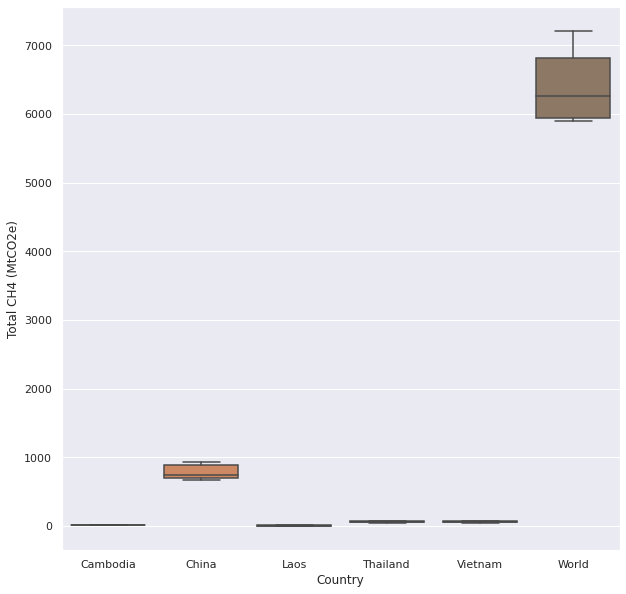

In [0]:
#Seaborn : Greenhouse_gas_emissions for countries of mekong and world (1990-2014)

import seaborn as sns

sns.set(rc = {'figure.figsize':(10, 10)})

sns.boxplot(x = df_greenhouse_gas_emissions_world['Country'],
            y = df_greenhouse_gas_emissions_world['Total CH4 (MtCO2e)'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


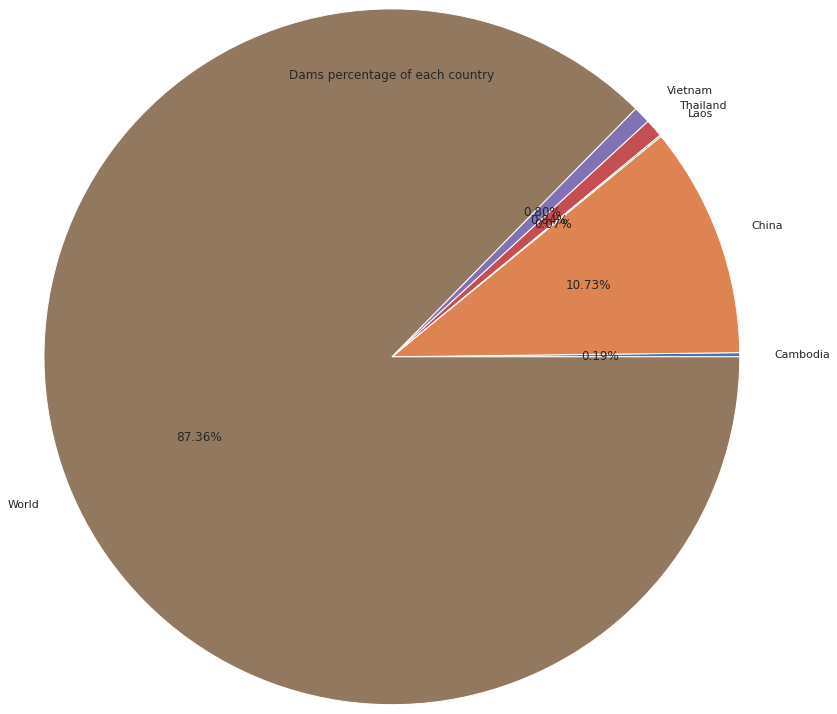

In [0]:
#matplotlib Pie : Greenhouse_gas_emissions for countries of mekong and world (1990-2014)

import matplotlib.pyplot as plt

plt.pie(df_columns_importants_groupby_Country,
        radius = 1.6,
        autopct='%1.2f%%',
        labels = df_columns_importants_groupby_Country.index)

plt.title("Dams percentage of each country")

plt.show()

###Total Greenhouse Gas Emissions for all world countries (only mekong coutries) (1990-2014)

The Emissions Time Series, EDGAR aims to inform scientists and policy makers on the evolution of the emission inventories over time for all world countries.

https://data.opendevelopmentmekong.net/dataset/total-greenhouse-gas-emissions-kt-of-co2-equivalent?type=dataset

In [0]:
ds_greenhouse_gas_emissions_mekong = drive.CreateFile({"id": "1hXApEWiQwRjSvPuqNXOEaErvb0wE1N7A"}) 
ds_greenhouse_gas_emissions_mekong.GetContentFile("Thu_dataset_Total greenhouse gas emissions of the Lower Mekong Countries (1990-2014).csv")

df_greenhouse_gas_emissions_mekong = pd.read_csv("Thu_dataset_Total greenhouse gas emissions of the Lower Mekong Countries (1990-2014).csv")
df_greenhouse_gas_emissions_mekong

,Country,Year,Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e),Total GHG Emissions Including Land-Use Change and Forestry (MtCO?e?),Total CO2 (excluding Land-Use Change and Forestry) (MtCO2),Total CH4 (MtCO2e),Total N2O (MtCO2e),Total F-Gas (MtCO2e),Total CO2 (including Land-Use Change and Forestry) (MtCO2),Total CH4 (including Land-Use Change and Forestry) (MtCO2e),Total N2O (including Land-Use Change and Forestry) (MtCO2e),Energy (MtCO2e),Industrial Processes (MtCO2e),Agriculture (MtCO2e),Waste (MtCO2e),Land-Use Change and Forestry (MtCO2),Bunker Fuels (MtCO2),Electricity/Heat (MtCO2),Manufacturing/Construction (MtCO2),Transportation (MtCO2),Other Fuel Combustion (MtCO2e),Fugitive Emissions (MtCO2e)
0,Cambodia,1990,15.351070,42.821070,1.260416,10.979845,3.110505,0.000304,27.660416,11.725845,3.434505,2.003348,0.000304,13.115257,0.232161,27.470000,NaN,NaN,NaN,NaN,0.742932,0.000000
1,Cambodia,1991,15.257660,42.727660,1.304384,10.754667,3.197588,0.001021,27.704384,11.500667,3.521588,2.189495,0.001021,12.825624,0.241520,27.470000,NaN,NaN,NaN,NaN,0.885111,0.000000
2,Cambodia,1992,15.888146,43.358146,1.348352,11.114496,3.423560,0.001738,27.748352,11.860496,3.747560,2.375641,0.001738,13.259887,0.250880,27.470000,NaN,NaN,NaN,NaN,1.027289,0.000000
3,Cambodia,1993,16.738263,44.208263,1.384992,11.805380,3.545435,0.002456,27.784992,12.551380,3.869435,2.554460,0.002456,13.921108,0.260239,27.470000,NaN,NaN,NaN,NaN,1.169468,0.000000
4,Cambodia,1994,15.894545,43.364545,1.476592,10.881084,3.533695,0.003173,27.876592,11.627084,3.857695,2.736942,0.054469,12.833535,0.269599,27.470000,NaN,NaN,NaN,NaN,1.311646,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Vietnam,2010,247.891988,242.124625,155.373176,69.070749,22.775025,0.673038,148.425813,69.907749,23.118025,149.348572,28.479134,61.098818,8.965464,-5.767363,3.06,41.49,41.56,30.53,23.233272,12.535300
121,Vietnam,2011,247.252115,227.737002,155.611920,69.373125,21.504719,0.762350,135.923808,69.494125,21.556719,148.619509,29.799550,59.771948,9.061107,-19.515113,2.42,40.26,42.98,30.10,23.059393,12.220116
122,Vietnam,2012,246.751221,227.495648,153.559368,69.693306,22.646884,0.851663,133.866794,69.998306,22.778884,148.196926,28.522191,60.875354,9.156750,-19.255574,2.52,41.45,42.34,29.60,22.235514,12.561412
123,Vietnam,2013,256.518782,238.849688,159.828648,70.364399,25.384759,0.940976,141.357554,70.987399,25.563759,153.740223,29.600784,63.925381,9.252393,-17.669094,2.73,44.45,44.57,28.82,23.161635,12.738588


In [0]:
df_columns_importants = df_greenhouse_gas_emissions_mekong[ ['Country', 'Year', 'Total CH4 (MtCO2e)'] ]
df_columns_importants

,Country,Year,Total CH4 (MtCO2e)
0,Cambodia,1990,10.979845
1,Cambodia,1991,10.754667
2,Cambodia,1992,11.114496
3,Cambodia,1993,11.805380
4,Cambodia,1994,10.881084
...,...,...,...
120,Vietnam,2010,69.070749
121,Vietnam,2011,69.373125
122,Vietnam,2012,69.693306
123,Vietnam,2013,70.364399


###Comparer le taux de CH4 (methane) produit par les pays du mékong qui possèdent des barrages hydrauélectriques

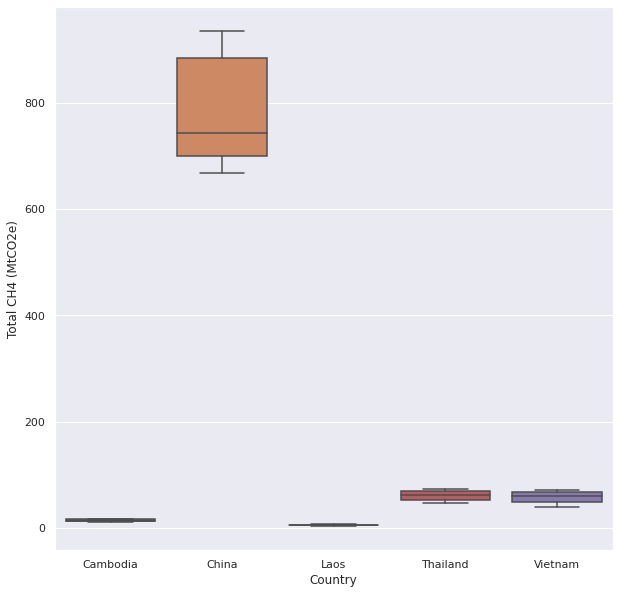

In [0]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(10, 10)})

sns.boxplot(x = df_greenhouse_gas_emissions_mekong['Country'],
            y = df_greenhouse_gas_emissions_mekong['Total CH4 (MtCO2e)'])
plt.show()

###Récupérer les valeurs "Total CH4 (MtCO2e)" de chaque pays

df_TotalCH4_Cambodia = df_greenhouse_gas_emissions_mekong[ ['Country', 'Year', 'Total CH4 (MtCO2e)'] ]

df_TotalCH4_Cambodia.loc[ (df_greenhouse_gas_emissions_mekong['Country'] == 'Cambodia')]

https://data.opendevelopmentmekong.net/dataset/total-greenhouse-gas-emissions-kt-of-co2-equivalent?type=dataset

In [0]:
dataset_TotalCH4_byYear = drive.CreateFile({"id": "15gBl3tpajk4w8TrcCV_Jk-x2tUJrZSK-"}) 

dataset_TotalCH4_byYear.GetContentFile("Thu_dataset_Total CH4 (MtCO2e) by Year of  the Lower Mekong Countries (1990-2014).csv")

df_dataset_TotalCH4_byYear = pd.read_csv("Thu_dataset_Total CH4 (MtCO2e) by Year of  the Lower Mekong Countries (1990-2014).csv")
df_dataset_TotalCH4_byYear

,Total CH4 (MtCO2e) by Year,Cambodia,China,Laos,Thailand,Vietnam
0,1990,10.979845,666.686294,4.471964,47.544922,39.460691
1,1991,10.754667,675.289590,4.381266,49.860603,41.140871
2,1992,11.114496,682.894451,4.549181,51.208330,42.825136
3,1993,11.805380,685.876068,4.569835,51.668786,44.204633
4,1994,10.881084,699.488087,4.812359,52.367193,45.316043
5,1995,12.535200,717.075625,4.812672,51.950177,46.912718
6,1996,12.418307,716.426475,4.897842,53.353095,49.490827
7,1997,12.555982,708.389138,5.077361,56.536718,51.447263
8,1998,12.509515,703.044808,4.838364,55.963044,54.070361
9,1999,13.229473,698.647453,4.830150,58.678710,56.819120


###Evolution de l'émission de CH4 par les pays du mékong

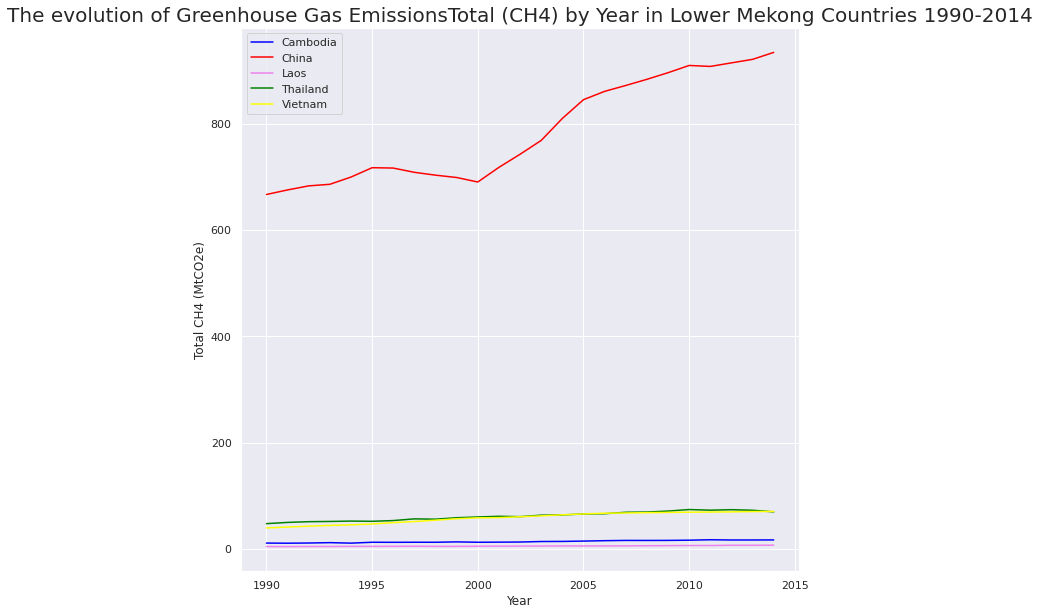

In [0]:
plt.plot(df_dataset_TotalCH4_byYear['Total CH4 (MtCO2e) by Year'],df_dataset_TotalCH4_byYear['Cambodia'],label='Cambodia', color='blue')
plt.plot(df_dataset_TotalCH4_byYear['Total CH4 (MtCO2e) by Year'],df_dataset_TotalCH4_byYear['China'],label='China', color='red')
plt.plot(df_dataset_TotalCH4_byYear['Total CH4 (MtCO2e) by Year'],df_dataset_TotalCH4_byYear['Laos'],label='Laos', color='violet')
plt.plot(df_dataset_TotalCH4_byYear['Total CH4 (MtCO2e) by Year'],df_dataset_TotalCH4_byYear['Thailand'],label='Thailand', color='green')
plt.plot(df_dataset_TotalCH4_byYear['Total CH4 (MtCO2e) by Year'],df_dataset_TotalCH4_byYear['Vietnam'],label='Vietnam', color='yellow')

plt.ylabel('Total CH4 (MtCO2e)')
plt.xlabel('Year')
plt.title('The evolution of Greenhouse Gas EmissionsTotal (CH4) by Year in Lower Mekong Countries 1990-2014',size = 20)
plt.legend()

plt.show()